## POE5 Chapter 7: Using Indicator Variables

### (Mostly done except marginal effects 5/13/21)

### 7.1 Indicator Variables

**POE5 Example 7.1 The university effect on house prices**


In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import f

In [2]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
utown = pd.read_csv(poe5csv+'utown.csv')

pd.set_option("display.precision", 4)

print(utown[0:5])
print(utown[500:505])
print(utown.describe(percentiles=[]))

     price   sqft  age  utown  pool  fplace
0  205.452  23.46    6      0     0       1
1  185.328  20.03    5      0     0       1
2  248.422  27.77    6      0     0       0
3  154.690  20.17    1      0     0       0
4  221.801  26.45    0      0     0       1
       price   sqft  age  utown  pool  fplace
500  314.650  29.28   24      1     1       0
501  288.556  24.48    4      1     0       1
502  302.834  27.02    1      1     0       1
503  247.820  21.26    2      1     0       1
504  269.971  22.76    4      1     0       0
           price       sqft        age      utown       pool     fplace
count  1000.0000  1000.0000  1000.0000  1000.0000  1000.0000  1000.0000
mean    247.6557    25.2096     9.3920     0.5190     0.2040     0.5180
std      42.1927     2.9185     9.4267     0.4999     0.4032     0.4999
min     134.3160    20.0300     0.0000     0.0000     0.0000     0.0000
50%     245.8325    25.3600     6.0000     1.0000     0.0000     1.0000
max     345.1970    30.0000 

In [3]:
utown['large'] = utown.sqft>25
utown['midprice'] = (utown.price > 215) & (utown.price < 275)
print(utown.head())

     price   sqft  age  utown  pool  fplace  large  midprice
0  205.452  23.46    6      0     0       1  False     False
1  185.328  20.03    5      0     0       1  False     False
2  248.422  27.77    6      0     0       0   True      True
3  154.690  20.17    1      0     0       0  False     False
4  221.801  26.45    0      0     0       1   True      True


### 7.1.2 Estimating an indicator variable regression

In [4]:
utown['sqft_utown'] = utown.sqft*utown.utown

formula = 'price ~ utown + sqft + sqft_utown + age + pool + fplace'
res = smf.ols(formula=formula,data=utown).fit()

print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5000      6.192      3.957      0.000      12.350      36.650
utown         27.4530      8.423      3.259      0.001      10.925      43.981
sqft           7.6122      0.245     31.048      0.000       7.131       8.093
sqft_utown     1.2994      0.332      3.913      0.000       0.648       1.951
age           -0.1901      0.051     -3.712      0.000      -0.291      -0.090
pool           4.3772      1.197      3.658      0.000       2.029       6.725
fplace         1.6492      0.972      1.697      0.090      -0.258       3.557


In [5]:
formula='price ~ utown * sqft + age + pool + fplace'
res = smf.ols(formula, data=utown).fit()

print(res.summary().tables[1])   

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5000      6.192      3.957      0.000      12.350      36.650
utown         27.4530      8.423      3.259      0.001      10.925      43.981
sqft           7.6122      0.245     31.048      0.000       7.131       8.093
utown:sqft     1.2994      0.332      3.913      0.000       0.648       1.951
age           -0.1901      0.051     -3.712      0.000      -0.291      -0.090
pool           4.3772      1.197      3.658      0.000       2.029       6.725
fplace         1.6492      0.972      1.697      0.090      -0.258       3.557


### 7.1.3 Testing the significance of the indicator variables



In [6]:
hypothesis = '(utown = 0), (utown:sqft = 0)'
f_test = res.f_test(hypothesis)

print(f"F{f_test.dist_args} = {f_test.fvalue:.4f}")
print(f"Prob > F = {f_test.pvalue:.4f}")

F(2.0, 993.0) = 1954.8295
Prob > F = 0.0000


### 7.1.4 Further calculations



In [7]:
hypothesis = 'Intercept + utown = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            51.9529      5.767      9.008      0.000      40.636      63.270


In [8]:
hypothesis = 'sqft + utown:sqft = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             8.9116      0.225     39.643      0.000       8.470       9.353


### 7.1.5 Computing average marginal effects

I don't know how to do this in statsmodels - will come back!

### 7.2 Applying Indicator Variables
#### POE5 Example 7.2 The effects of race and sex on wage


In [9]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
cps5s = pd.read_csv(poe5csv+'cps5_small.csv')

print(cps5s.describe(percentiles=[]).transpose())

          count        mean         std   min      50%       max
black    1200.0      0.0875      0.2827  0.00      0.0       1.0
educ     1200.0     14.2025      2.8908  0.00     14.0      21.0
exper    1200.0     23.3742     13.2693  0.00     24.0      62.0
faminc   1200.0  35304.4217  45026.4882  0.00  23679.0  469000.0
female   1200.0      0.4400      0.4966  0.00      0.0       1.0
metro    1200.0      0.8217      0.3830  0.00      1.0       1.0
midwest  1200.0      0.2475      0.4317  0.00      0.0       1.0
south    1200.0      0.3250      0.4686  0.00      0.0       1.0
wage     1200.0     23.6400     15.2166  3.94     19.3     221.1
west     1200.0      0.2525      0.4346  0.00      0.0       1.0


In [10]:
cps5s['blk_female'] = cps5s.black*cps5s.female
formula = 'wage ~ educ + black + female + blk_female'
res = smf.ols(formula=formula,data=cps5s).fit()

print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4821      1.958     -4.843      0.000     -13.324      -5.641
educ           2.4737      0.135     18.310      0.000       2.209       2.739
black         -2.0653      2.162     -0.955      0.340      -6.306       2.176
female        -4.2235      0.825     -5.120      0.000      -5.842      -2.605
blk_female     0.5329      2.802      0.190      0.849      -4.965       6.030


In [11]:
hypothesis = 'black + female + blk_female = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -5.7558      1.757     -3.275      0.001      -9.203      -2.308


In [12]:
hypothesis = 'black = 0, female = 0, blk_female = 0'
f_test = res.f_test(hypothesis)
print(f"F{f_test.dist_args} = {f_test.fvalue:.4f}")
print(f"Prob > F = {f_test.pvalue:.4f}")

F(3.0, 1195.0) = 10.5183
Prob > F = 0.0000


#### POE5 Example 7.3 A Wage equation with regional indicators

WARNING ON THE NEW UPDATE FOR STATSMODELS - {f_test.statistic:.4f}") changed

In [13]:
formula = 'wage ~ educ + black + female + blk_female + south + midwest + west'
res = smf.ols(formula=formula,data=cps5s).fit()

print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3708      2.154     -3.886      0.000     -12.597      -4.145
educ           2.4670      0.135     18.260      0.000       2.202       2.732
black         -1.8777      2.180     -0.861      0.389      -6.155       2.399
female        -4.1861      0.825     -5.077      0.000      -5.804      -2.568
blk_female     0.6190      2.801      0.221      0.825      -4.876       6.114
south         -1.6523      1.156     -1.430      0.153      -3.920       0.615
midwest       -1.9392      1.208     -1.605      0.109      -4.310       0.431
west          -0.1452      1.203     -0.121      0.904      -2.505       2.214


In [14]:
hypothesis = 'south=0, midwest=0, west=0'
f_test = res.f_test(hypothesis)
print(f"F{f_test.dist_args} = {f_test.fvalue:.4f}")
print(f"Prob > F = {f_test.pvalue:.4f}")

F(3.0, 1192.0) = 1.5792
Prob > F = 0.1926


In [15]:
f_crit_95 = f.ppf(q=0.95, dfn=3, dfd=1192)
f_crit_90 = f.ppf(q=0.90, dfn=3, dfd=1192)
print(f"F(3,1192,0.95) = {f_crit_95:.4f}")
print(f"F(3,1192,0.90) = {f_crit_90:.4f}")

F(3,1192,0.95) = 2.6124
F(3,1192,0.90) = 2.0884


#### POE5 Example 7.4 Testing the equivalence of two regressions: The Chow test

In [16]:
cps5s['south_educ'] = cps5s.south*cps5s.educ
cps5s['south_black'] = cps5s.south*cps5s.black
cps5s['south_female'] = cps5s.south*cps5s.female
cps5s['south_blk_female'] = cps5s.south*cps5s.blk_female

formula = 'wage ~ educ + black + female + blk_female + south + \
          south_educ + south_black + south_female + south_blk_female'

res = smf.ols(formula=formula,data=cps5s).fit()

print(res.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.9991      2.387     -4.189      0.000     -14.683      -5.315
educ                 2.5271      0.164     15.391      0.000       2.205       2.849
black                1.1276      3.525      0.320      0.749      -5.788       8.043
female              -4.1520      0.984     -4.219      0.000      -6.083      -2.221
blk_female          -4.4540      4.486     -0.993      0.321     -13.255       4.347
south                1.5829      4.182      0.379      0.705      -6.622       9.788
south_educ          -0.1714      0.290     -0.591      0.554      -0.740       0.397
south_black         -4.6204      4.507     -1.025      0.306     -13.463       4.222
south_female        -0.1886      1.808     -0.104      0.917      -3.736       3.359
south_blk_female     8.1195      5.822      1.395      0.163     

In [17]:
hypothesis = 'south=0, south_educ=0, south_black=0, south_female=0, \
              south_blk_female=0'
f_test = res.f_test(hypothesis)
print(f"F{f_test.dist_args} = {f_test.fvalue:.4f}")
print(f"Prob > F = {f_test.pvalue:.4f}")

F(5.0, 1190.0) = 0.6980
Prob > F = 0.6250


In [18]:
hypothesis = 'black + south_black = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -3.4928      2.809     -1.243      0.214      -9.004       2.018


In [19]:
hypothesis = 'female + south_female = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -4.3406      1.517     -2.862      0.004      -7.316      -1.365


### 7.2.4 Estimating separate regressions


In [20]:
cps5s_south = cps5s[cps5s.south==1].copy() # new DataFrame containing only south region
cps5s_not_south = cps5s[cps5s.south==0].copy() # new DataFrame only non-south

formula = 'wage ~ educ + black + female + blk_female'
res_south = smf.ols(formula=formula,data=cps5s_south).fit()
res_not_south = smf.ols(formula=formula,data=cps5s_not_south).fit()

print(res_not_south.summary(slim=True,title="OLS Results: Not South"))
print(res_south.summary(slim=True,title="OLS Results: South"))

                            OLS Results: Not South                            
Dep. Variable:                   wage   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.260
No. Observations:                 810   F-statistic:                     71.94
Covariance Type:            nonrobust   Prob (F-statistic):           4.06e-52
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9991      2.227     -4.489      0.000     -14.371      -5.627
educ           2.5271      0.153     16.496      0.000       2.226       2.828
black          1.1276      3.288      0.343      0.732      -5.327       7.583
female        -4.1520      0.918     -4.522      0.000      -5.954      -2.350
blk_female    -4.4540      4.185     -1.064      0.288     -12.669       3.761

Notes:
[1] Standard Errors assume that the covarian

#### POE5 Example 7.5 and 7.6 Indicator variables in a log-linear model ..

In [21]:
cps5s['lwage'] = np.log(cps5s.wage)
res = smf.ols('lwage ~ educ + female',data=cps5s).fit()

wd = np.exp(res.params.female)-1
se = np.sqrt(np.exp(res.params.female)**2 * res.cov_params().female.female)

print(f"The estimated male/female wage differential is "
      f"{100*wd:.3f}% +- {100*se:.3f}%\n")
print(res.summary().tables[1])

The estimated male/female wage differential is -16.288% +- 2.339%

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6229      0.069     23.461      0.000       1.487       1.759
educ           0.1024      0.005     21.343      0.000       0.093       0.112
female        -0.1778      0.028     -6.364      0.000      -0.233      -0.123


#### POE5 Example 7.7: The Linear probability Model: An Example from Marketing

In [22]:
coke = pd.read_csv(poe5csv+'coke.csv')

print(coke.describe(percentiles=[]).transpose())

formula = 'coke ~ pratio + disp_coke + disp_pepsi'
res_coke = smf.ols(formula=formula,data=coke).fit()

print(res_coke.summary(slim=True))

             count    mean     std     min   50%     max
coke        1140.0  0.4474  0.4974  0.0000  0.00  1.0000
pr_pepsi    1140.0  1.2027  0.3007  0.6800  1.19  1.7900
pr_coke     1140.0  1.1901  0.2999  0.6800  1.19  1.7900
disp_pepsi  1140.0  0.3640  0.4814  0.0000  0.00  1.0000
disp_coke   1140.0  0.3789  0.4853  0.0000  0.00  1.0000
pratio      1140.0  1.0272  0.2866  0.4972  1.00  2.3247
                            OLS Regression Results                            
Dep. Variable:                   coke   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
No. Observations:                1140   F-statistic:                     51.67
Covariance Type:            nonrobust   Prob (F-statistic):           2.64e-31
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8902      0.065     13.594     

In [23]:
coke['phat'] = res_coke.predict()
print(coke.phat.describe(percentiles=[]))

count    1140.0000
mean        0.4474
std         0.1724
min        -0.2073
50%         0.4596
max         0.7681
Name: phat, dtype: float64


In [24]:
print(coke[coke.phat<=0].phat.describe(percentiles=[]))

count    16.0000
mean     -0.0184
std       0.0523
min      -0.2073
50%      -0.0002
max      -0.0002
Name: phat, dtype: float64


#### POE5 Example 7.8 An Application of difference estimateion: Project STAR

In [25]:
star = pd.read_csv(poe5csv+'star.csv')
print(f"Total number of Observations = {len(star)}")
star = star[star.aide==0]
print(f"Classrooms without aide present = {len(star)}")

Total number of Observations = 5786
Classrooms without aide present = 3743


In [26]:
x1list = ['small']
x2list = x1list + ['tchexper']
x3list = x2list + ['boy','freelunch','white_asian']
x4list = x3list + ['tchwhite','tchmasters','schurban','schrural']

In [27]:
print(star[['totalscore']+x4list][star.regular==1].describe(percentiles=[]).transpose())

              count      mean      std    min    50%     max
totalscore   2005.0  918.0429  73.1380  635.0  912.0  1229.0
small        2005.0    0.0000   0.0000    0.0    0.0     0.0
tchexper     2005.0    9.0683   5.7244    0.0    9.0    24.0
boy          2005.0    0.5132   0.4999    0.0    1.0     1.0
freelunch    2005.0    0.4738   0.4994    0.0    0.0     1.0
white_asian  2005.0    0.6813   0.4661    0.0    1.0     1.0
tchwhite     2005.0    0.7980   0.4016    0.0    1.0     1.0
tchmasters   2005.0    0.3651   0.4816    0.0    0.0     1.0
schurban     2005.0    0.3012   0.4589    0.0    0.0     1.0
schrural     2005.0    0.4998   0.5001    0.0    0.0     1.0


In [28]:
print(star[['totalscore']+x4list][star.small==1].describe(percentiles=[]).transpose())

              count      mean      std    min    50%     max
totalscore   1738.0  931.9419  76.3586  747.0  924.0  1253.0
small        1738.0    1.0000   0.0000    1.0    1.0     1.0
tchexper     1738.0    8.9954   5.7316    0.0    8.0    27.0
boy          1738.0    0.5150   0.4999    0.0    1.0     1.0
freelunch    1738.0    0.4718   0.4993    0.0    0.0     1.0
white_asian  1738.0    0.6847   0.4648    0.0    1.0     1.0
tchwhite     1738.0    0.8625   0.3445    0.0    1.0     1.0
tchmasters   1738.0    0.3176   0.4657    0.0    0.0     1.0
schurban     1738.0    0.3061   0.4610    0.0    0.0     1.0
schrural     1738.0    0.4626   0.4987    0.0    0.0     1.0


In [29]:
print(star[x3list].corr())

              small  tchexper     boy  freelunch  white_asian
small        1.0000   -0.0064  0.0017    -0.0020       0.0036
tchexper    -0.0064    1.0000 -0.0341    -0.0969       0.1286
boy          0.0017   -0.0341  1.0000     0.0066       0.0231
freelunch   -0.0020   -0.0969  0.0066     1.0000      -0.4378
white_asian  0.0036    0.1286  0.0231    -0.4378       1.0000


In [30]:
# Use Python .join() method to generate our formula strings
example_formula = 'totalscore ~ ' + ' + '.join(x3list)
print(example_formula)

totalscore ~ small + tchexper + boy + freelunch + white_asian


In [31]:
f1 = 'totalscore ~ ' + ' + '.join(x1list)
mod1 = smf.ols(formula=f1,data=star).fit() 

f2 = 'totalscore ~ ' + ' + '.join(x2list)
mod2 = smf.ols(formula=f2,data=star).fit() 

f3 = 'totalscore ~ ' + ' + '.join(x3list)
mod3 = smf.ols(formula=f3,data=star).fit() 

f4 = 'totalscore ~ ' + ' + '.join(x4list)
mod4 = smf.ols(formula=f4,data=star).fit() 

In [32]:
from pystout import pystout

pystout(models=[mod1,mod2,mod3,mod4],
        file='Table7.9.tex',
        digits=3,
        modstat={},
        exogvars=['small','tchexper','boy'],
        stars={.05:'*',0.01:"**",0.001:'***'},
        addnotes=['Standard errors in parentheses',
                  '* $p<0.05$, ** $p<0.01$, *** $p<0.001$'])

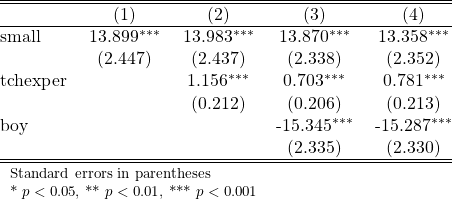

![alt](https://quicklatex.com/cache3/f9/ql_10a65f343c5df9b96ad975608e7b9ef9_l3.png)

#### POE5 Example 7.10 The difference estimator with fixed effects

Whew - complicated!  I have a bare bones Example7.10.py file, but GRETL manual skips this example, and for now I'm skipping it, too.


##ADD star1 not star for accurate regression results. old figure in text right now.

#### POE5 Example 7.11 Linear probability model check of random assignment

In [33]:
formula = 'small ~ boy + white_asian + tchexper + freelunch'

res = smf.ols(formula=formula,data=star).fit() 

print(res.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  small   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
No. Observations:                3743   F-statistic:                   0.05902
Covariance Type:            nonrobust   Prob (F-statistic):              0.994
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4665      0.025     18.542      0.000       0.417       0.516
boy             0.0014      0.016      0.086      0.931      -0.031       0.033
white_asian     0.0044      0.020      0.225      0.822      -0.034       0.043
tchexper       -0.0006      0.001     -0.419      0.675      -0.003       0.002
freelunch      -0.0009      0.018     -0.049      0.961      -0.037       0.035

Notes:
[1] Standard Errors assume that the c

#### POE5 Examples 7.12 Estimating the effect of a minimum wage change: the DID estimator

In [34]:
njmin3 = pd.read_csv(poe5csv+'njmin3.csv') 

vars = ['nj','d','d_nj','fte']
print(njmin3[vars].describe(percentiles=[]).transpose())

      count     mean     std  min   50%   max
nj    820.0   0.8073  0.3946  0.0   1.0   1.0
d     820.0   0.5000  0.5003  0.0   0.5   1.0
d_nj  820.0   0.4037  0.4909  0.0   0.0   1.0
fte   794.0  21.0265  9.4227  0.0  20.0  85.0


In [35]:
# The various means for the DID estimator are computed using
print(njmin3[['fte','nj','d']].groupby(['nj','d']).describe())

        fte                                                 
      count     mean      std  min    25%    50%   75%   max
nj d                                                        
0  0   77.0  23.3312  11.8563  7.5  15.50  20.50  27.0  70.5
   1   77.0  21.1656   8.2767  0.0  15.00  20.00  26.0  43.5
1  0  321.0  20.4394   9.1062  5.0  14.25  19.25  24.0  85.0
   1  319.0  21.0274   9.2930  0.0  14.50  20.50  26.5  60.5


In [36]:
did1 = smf.ols('fte ~ nj + d + d_nj',data=njmin3).fit() 

print(did1.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
No. Observations:                 794   F-statistic:                     1.964
Covariance Type:            nonrobust   Prob (F-statistic):              0.118
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.072     21.767      0.000      21.227      25.435
nj            -2.8918      1.194     -2.423      0.016      -5.235      -0.549
d             -2.1656      1.516     -1.429      0.154      -5.141       0.810
d_nj           2.7536      1.688      1.631      0.103      -0.561       6.068

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [37]:
print(did1.t_test('nj + Intercept = 0'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            20.4394      0.525     38.934      0.000      19.409      21.470


In [38]:
print(did1.t_test('d + Intercept = 0'))
print(did1.t_test('nj + d + d_nj + Intercept = 0'))
print(did1.t_test('d_nj = 0'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.1656      1.072     19.746      0.000      19.062      23.270
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.0274      0.527     39.930      0.000      19.994      22.061
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.7536      1.688      1.631      0.103      -0.561       6.068


In [39]:
f2 = 'fte ~ nj + d + d_nj + kfc + roys + wendys + co_owned'
did2 = smf.ols(formula=f2,data=njmin3).fit() 

f3 = 'fte ~ nj + d + d_nj + kfc + roys + wendys + co_owned + southj + centralj + pa1'
did3 = smf.ols(formula=f3,data=njmin3).fit() 

pystout(models=[did1,did2,did3],
        file='Table7.12.tex',
        digits=3,
        modstat={},
        exogvars=['nj','d','d_nj'],
        stars={.05:'*',0.01:"**",0.001:'***'},
        addnotes=['Standard errors in parentheses',
                  '* $p<0.05$, ** $p<0.01$, *** $p<0.001$'])

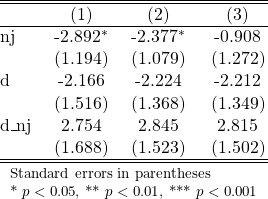

In [40]:
did4 = smf.ols('fte ~ nj + d + d_nj',data=njmin3.dropna()).fit() 
print(did4.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
No. Observations:                 768   F-statistic:                     1.947
Covariance Type:            nonrobust   Prob (F-statistic):              0.121
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3800      1.098     21.288      0.000      21.224      25.536
nj            -2.9494      1.224     -2.409      0.016      -5.353      -0.546
d             -2.2833      1.553     -1.470      0.142      -5.332       0.766
d_nj           2.7500      1.731      1.588      0.113      -0.649       6.149

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
